In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)
nba2021_df = pd.read_csv('nba2021_per_game.csv')

nba2021_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,2.6,4.4,0.590,0.590,1.3,2.4,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,0.2,1.0,0.167,0.125,0.0,0.0,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,3.5,5.7,0.606,0.603,1.1,2.3,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,7.3,12.7,0.576,0.576,5.1,6.0,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,4.6,8.8,0.525,0.529,0.9,1.2,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1


In [2]:
players = nba2021_df.groupby('Player')

mult_teams = []
for player, player_df in players:
    if len(player_df.index) > 1:
        # if a player played for multiple teams, we only want to keep their total stats
        mult_teams.append(player)

for idx, row in nba2021_df.iterrows():
    if row.Player in mult_teams and row.Tm != 'TOT':
        nba2021_df = nba2021_df.drop([idx])

for player in mult_teams:
    # each print should show one row, where the player team is TOT (total)
    print(nba2021_df[nba2021_df.Player == player])

FTA    FT%  ORB  DRB  TRB  AST  STL  \
403  0.333  4.2  9.3  0.452  0.462  2.7  3.2  0.841  0.4  1.8  2.2  4.0  1.2   

     BLK  TOV   PF   PTS  
403  0.4  1.9  1.1  13.5  
           Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  3PA  \
181  James Harden  SG   31  TOT  24  24  37.6  7.6  15.8  0.482  3.0  7.9   

       3P%   2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB   AST  STL  \
181  0.384  4.6  7.9  0.579  0.578  6.2  6.9  0.897  0.8  6.5  7.3  11.3  1.0   

     BLK  TOV   PF   PTS  
181  0.8  4.3  2.3  24.5  
          Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%   3P  3PA   3P%  \
8  Jarrett Allen   C   22  TOT  28  10  26.2  4.4  6.8  0.642  0.0  0.1  0.25   

    2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
8  4.3  6.6  0.651  0.645  3.6  4.7  0.758  2.9  6.1  9.0  1.6  0.5  1.6  1.5   

    PF   PTS  
8  1.6  12.3  
             Player    Pos  Age   Tm   G  GS   MP   FG  FGA  FG%   3P  3PA  \
255  Rodions Kurucs 

In [3]:
# okay so now that we have a fully unique datatset of current players, lets study HOF players

URL = 'https://www.basketball-reference.com/awards/hof.html'

req = requests.get(URL)
soup = bs(req.content, 'html.parser')
table = soup.find('table').prettify()

hof_df = pd.read_html(table, flavor = 'bs4')[0]

In [4]:
hof_df.columns = hof_df.columns.droplevel()
for idx, row in hof_df.iterrows():
   if row.Category != 'Player':
       hof_df = hof_df.drop([idx])

hof_df.head()

,Year,Name,Category,G,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Unnamed: 14_level_1,G,W,L,W/L%
1,2020,Kobe Bryant Player / Oly,Player,1346,25.0,5.2,4.7,1.4,0.5,.447,.329,.837,172.7,.170,NaN,NaN,NaN,NaN,NaN
2,2020,Tamika Catchings WNBA,Player,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,Tim Duncan Player / Coach / Oly / CBB ...,Player,1392,19.0,10.8,3.0,0.7,2.2,.506,.179,.696,206.4,.209,NaN,NaN,NaN,NaN,NaN
4,2020,Kevin Garnett Player / Oly,Player,1462,17.8,10.0,3.7,1.3,1.4,.497,.275,.789,191.4,.182,NaN,NaN,NaN,NaN,NaN
14,2019,Carl Braun Player / Coach,Player,788,13.5,3.4,3.7,NaN,NaN,.383,NaN,.804,64.3,.119,NaN,NaN,NaN,NaN,NaN


In [5]:
hof_df = hof_df.drop(['Unnamed: 14_level_1'],axis=1)

In [6]:
# drop WNBA players since we're only studying NBA
for idx, row in hof_df.iterrows():
    if 'WNBA' in row.Name:
        hof_df = hof_df.drop(idx)

# the Name category has some extra stuff, lets drop it to only <firstName lastName> 

# later: let's fix charles barkely and other players with nicknames
hof_df['Name'] = hof_df['Name'].apply(lambda x: x.split()[0] + ' ' + x.split()[1])

hof_df.head()

,Year,Name,Category,G,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,G,W,L,W/L%
1,2020,Kobe Bryant,Player,1346,25.0,5.2,4.7,1.4,0.5,.447,.329,.837,172.7,.170,NaN,NaN,NaN,NaN
3,2020,Tim Duncan,Player,1392,19.0,10.8,3.0,0.7,2.2,.506,.179,.696,206.4,.209,NaN,NaN,NaN,NaN
4,2020,Kevin Garnett,Player,1462,17.8,10.0,3.7,1.3,1.4,.497,.275,.789,191.4,.182,NaN,NaN,NaN,NaN
14,2019,Carl Braun,Player,788,13.5,3.4,3.7,NaN,NaN,.383,NaN,.804,64.3,.119,NaN,NaN,NaN,NaN
15,2019,Charles “Chuck”,Player,409,6.7,5.9,1.8,NaN,NaN,.339,NaN,.743,11.6,.050,NaN,NaN,NaN,NaN


In [70]:
# now that we have data on HOF players, we can build a model for what stats get a player into the HOF
# we can use this model on active players, and then calculate probabilities for their chances of getting into the HOF

# other things to do: 
# 1. explore other variables (i.e. make plots) to study what sets a HOF player apart from a non-HOF player
# 2. find the least impactful metrics -- what's the worst a player could do and still have a better than 1/2 chance at the HOF?
# 3. explore how different variables matter more/less w/time
# 

hof_df = hof_df.sort_values(by=['Year'])

##########Surmud Code begins here######################
#some non nba heads are still in the hall of famer data frame.

#- drop rows of the df that have PTS listed as NaN. This will remove all non-nba players.
hof_df = hof_df.dropna(subset=['PTS'])

#cast the numbers in the main categories into floating points from strings
hof_df["Year"] = pd.to_numeric(pd.Series(hof_df["Year"])) 
hof_df["PTS"] = pd.to_numeric(pd.Series(hof_df["PTS"])) 
hof_df["TRB"] = pd.to_numeric(pd.Series(hof_df["TRB"])) 
hof_df["AST"] = pd.to_numeric(pd.Series(hof_df["AST"])) 
hof_df["BLK"] = pd.to_numeric(pd.Series(hof_df["BLK"])) 
hof_df["STL"] = pd.to_numeric(pd.Series(hof_df["STL"])) 

(0.0, 23.955)

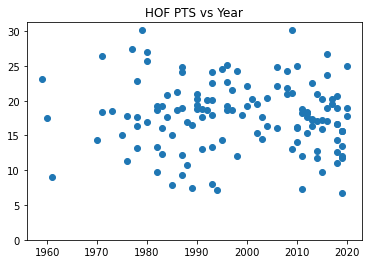

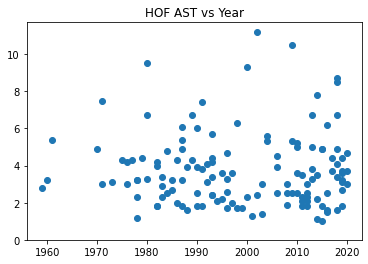

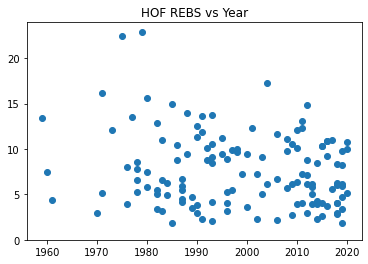

In [60]:
#Show a visual of how stats of hall of famers have changed through the years
plt.scatter(hof_df["Year"], hof_df["PTS"])
plt.title("HOF PTS vs Year")
plt.ylim(0)

plt.figure()
plt.scatter(hof_df["Year"], hof_df["AST"])
plt.title("HOF AST vs Year")
plt.ylim(0)

plt.figure()
plt.scatter(hof_df["Year"], hof_df["TRB"])
plt.title("HOF REBS vs Year")
plt.ylim(0)

#from plots below it looks like hall of famers haven't really varied too much in terms of average number of points scored per game or assists per game

#Very interesting how the number of rebounds has decreased in the past few years - might have to do with how the league has gotten smaller with less dominant big men

#A huge problem with these graphs: not everyone has been inducted 5 years after they played. Some players inducted in the past few years have played way back in the 1960s or 70s, and are being inducted now. These graphs don't necessarily represent when the players actually played. We could explore this question further by finding the exact years the players have played and plotting based on that

In [66]:
currSeasonStats = pd.read_csv("nba2021_per_game.csv")

In [78]:
#build a footprint of the "average nba player today" by finding the mean points, rebounds, assists, steals, and blocks scored today
curr_points = np.mean(currSeasonStats["PTS"])
curr_assists = np.mean(currSeasonStats["AST"])
curr_rebounds = np.mean(currSeasonStats["TRB"])
curr_blocks = np.mean(currSeasonStats["BLK"])
curr_steals = np.mean(currSeasonStats["STL"])

#build a footprint of the average hall of famer by finding the mean in the same fashion as above
hof_points = np.mean(hof_df["PTS"])
hof_assists = np.mean(hof_df["AST"])
hof_rebounds = np.mean(hof_df["TRB"])
hof_blocks = np.mean(hof_df["BLK"])
hof_steals = np.mean(hof_df["STL"])

Text(0.5, 1.0, 'Steals')

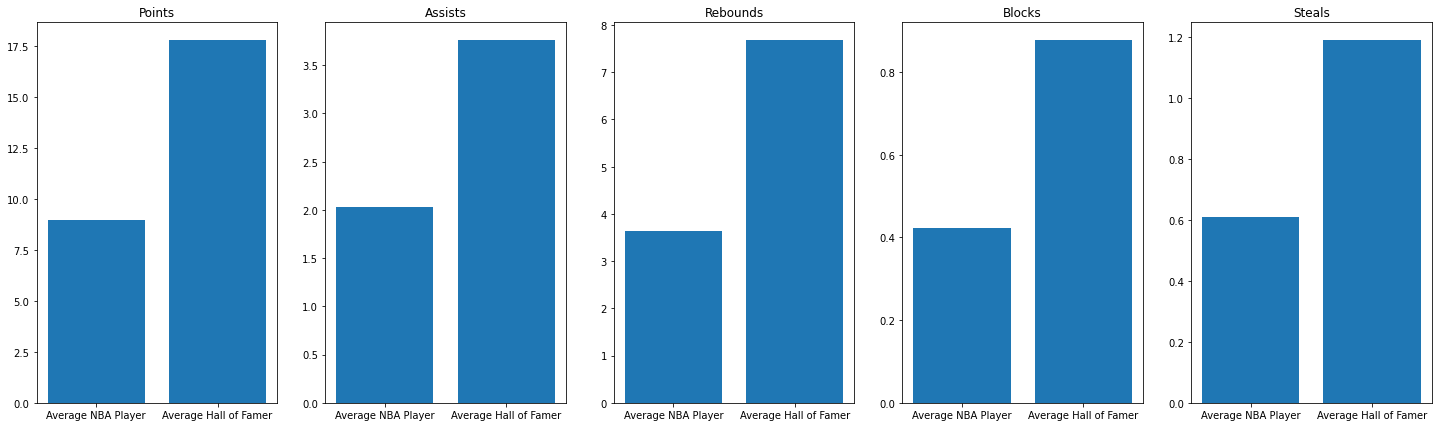

In [101]:
#compare the average player today with the average hall of famer across all categories

plt.figure(figsize=(25, 7))

plt.subplot(1, 5,1)
plt.bar(["Average NBA Player", "Average Hall of Famer"], [curr_points, hof_points])
plt.title("Points")

plt.subplot(1, 5,2)
plt.bar(["Average NBA Player", "Average Hall of Famer"], [curr_assists, hof_assists])
plt.title("Assists")

plt.subplot(1, 5, 3)
plt.bar(["Average NBA Player", "Average Hall of Famer"], [curr_rebounds, hof_rebounds])
plt.title("Rebounds")

plt.subplot(1, 5, 4)
plt.bar(["Average NBA Player", "Average Hall of Famer"], [curr_blocks, hof_blocks])
plt.title("Blocks")

plt.subplot(1, 5, 5)
plt.bar(["Average NBA Player", "Average Hall of Famer"], [curr_steals, hof_steals])
plt.title("Steals")

It's interesting how the ratio between an average player's stats and a hall of famers stats are NEARLY THE SAME across categories. The bars are almost perfectly aligned across the above graph. 

In [103]:
# where should we go from here? Here are some of my ideas:

#- for a given nba player, we could check how much closer they are to the average compared to a hall of famer. If the euclidian distance of a players stats are closer to the average nba player, we don't classify them as a hall of famer. (Like an SVM decision boundary). The problem is that the decision boundary probably won't be precisely in between the two points above. So what we could do is test different decision boundaries by splitting the hall of famers into training and testing sets, and seeing which decision boundaries perform the best before they overfit to the hall of famers. 

#- set an arbitrary rule. Maybe something like if a player exceeds the average hall of famer in at least 3 of the 5 categories, we classify them as a hall of famer. 

#- we could set weights to differrent categories. Points are probably more important than steals so we might wanna weigh differently

#- try classifying based on positions. The average point guard will probably have a different distribution of stats compared to an average center. If we get more specific, it might give us better analysis. Only problem is that the HOF table doesn't contain position

#- before i forget, lets throw in Jose Calderon into our test set whenever we end up testing this out

#### End Surmud Code####